# EML6281
## Assignment 3
### Elias Reyes

In [4]:
#################################################################

### Problem 3.1

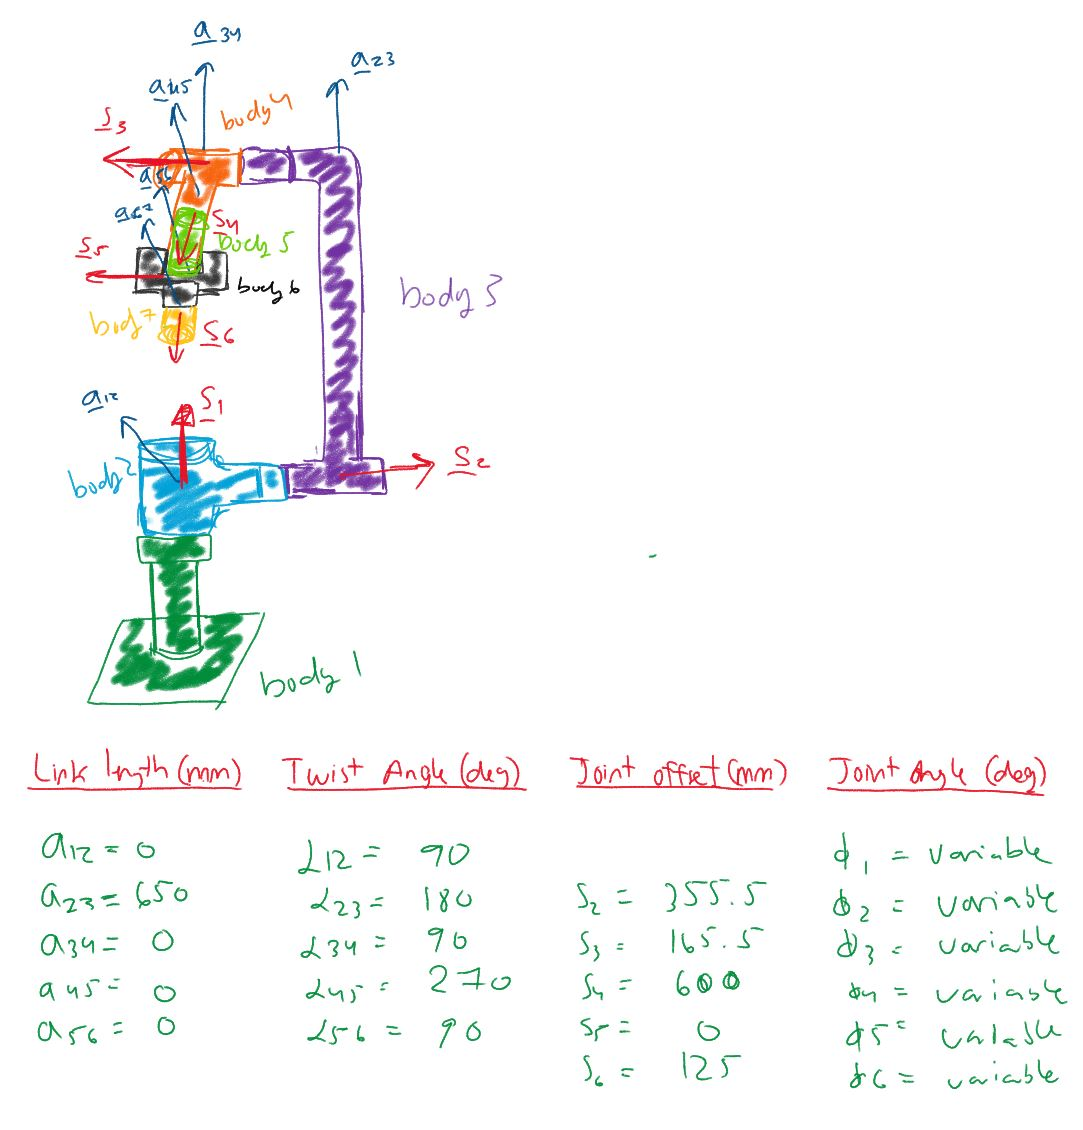

In [1]:
from IPython.display import Image

Image('3_1.JPG', width=700)

### Problem 4.1

In [2]:
# file that is currently home to the class PUMA. Currently this class
# creates a puma onject and allows for the forwardAnalysis method.
# future improvement would include adding capability of reverse analysis 
# and making the class work for any robot 

import numpy as np
from numpy import deg2rad, pi
from math import cos
from math import sin

class PUMA:
    def __init__(self,phi1,theta2,theta3,theta4,theta5,theta6,S6):
        self.phi1   = phi1
        self.theta2 = theta2
        self.theta3 = theta3
        self.theta4 = theta4
        self.theta5 = theta5
        self.theta6 = theta6
        self.S6     = S6


    def constructSingleTransformation(self,a,alpha,theta,S):

        T = np.zeros((4,4))
    
        T[0][0] = cos(theta)
        T[0][1] = -sin(theta)
        T[0][3] = a
        T[1][0] = sin(theta)*cos(alpha)
        T[1][1] = cos(theta)*cos(alpha)
        T[1][2] = -sin(alpha)
        T[1][3] = -sin(alpha)*S
        T[2][0] = sin(theta)*sin(alpha)
        T[2][1] = cos(theta)*sin(alpha)
        T[2][2] = cos(alpha)
        T[2][3] = cos(alpha)*S       
        T[3][3] = 1

        return T

    def contruct1toFixed(self,phi):

        T = np.zeros((4,4))
        T[0][0] = cos(phi)
        T[0][1] = -sin(phi)
        T[1][0] = sin(phi)
        T[1][1] = cos(phi)
        T[2][2] = 1
        T[3][3] = 1

        return T

    def forwardAnalysis(self):
        
        a12, a23, a34, a45, a56 = 0, 17, 0.8, 0, 0
        alpha12 = deg2rad(90)
        alpha23 = 0
        alpha34 = deg2rad(270)
        alpha45 = deg2rad(90)
        alpha56 = deg2rad(90)
        S2, S3, S4, S5 = 5.9, 0, 17, 0

        phi1   = self.phi1 
        theta2 = self.theta2
        theta3 = self.theta3
        theta4 = self.theta4
        theta5 = self.theta5
        theta6 = self.theta6
        S6     = self.S6    

        T_1toF = self.contruct1toFixed(phi1)
        T_2to1 = self.constructSingleTransformation(a12,alpha12,theta2,S2)
        T_3to2 = self.constructSingleTransformation(a23,alpha23,theta3,S3)
        T_4to3 = self.constructSingleTransformation(a34,alpha34,theta4,S4)
        T_5to4 = self.constructSingleTransformation(a45,alpha45,theta5,S5)
        T_6to5 = self.constructSingleTransformation(a56,alpha56,theta6,S6)

        T_6toF = T_1toF@T_2to1@T_3to2@T_4to3@T_5to4@T_6to5

        return T_6toF

In [3]:
import numpy as np
from numpy import deg2rad, pi
import sys
sys.path.append("..")
from utils import *

phi1   = 5*pi/4
theta2 = 5*pi/6
theta3 = -pi/3
theta4 = pi/4
theta5 = pi/3
theta6 = -pi/6
S6     = 4

# create puma object
puma   = PUMA(phi1,theta2,theta3,theta4,theta5,theta6,S6)
T_6toF = puma.forwardAnalysis()

print(T_6toF)

[[ 9.96836437e-01 -1.82648404e-03  7.94593113e-02  1.85770539e+01]
 [ 6.38237349e-02  6.14198920e-01 -7.86566092e-01  2.34568123e+01]
 [-4.73671727e-02  7.89149131e-01  6.12372436e-01  1.17494897e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
